In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_palette(sns.color_palette("Set1", n_colors=8, desat=.5))

In [2]:
# Gradient descent required functions:
# ------------------------------------
def sigmoid(X): 
    return 1 / (1 + np.exp(-X))

def probability(X, weights, bias):
    return sigmoid(np.dot(X, weights) + bias)

def cross_entropy_ave(y, y_hat):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

# get average gradient of cross entropy loss at all data points in X
def d_Error(X, y, weights, bias):
    y_hat = probability(X, weights, bias)
    dE_matrix =  (X.T * (y - y_hat)).T 
    dEdw = np.atleast_2d(dE_matrix).mean(axis=0)
    dEdb = (y - y_hat).mean() 
    dEdz = np.append(dEdw, dEdb)
    return dEdz

def update(X, y, weights, bias, lr):
    dEdz = d_Error(X, y, weights, bias)
    dEdw = dEdz[:-1]
    dEdb = dEdz[-1]
    weights += lr * dEdw
    bias += lr * dEdb
    return weights, bias

In [3]:
# Plotting Functions: 
# ------------------------------------
def plot_data(data):
    ax = sns.scatterplot(x=0, y=1, hue=2, data=data, legend=False)
    
def plot_lines(m, b, color='g:'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [4]:
np.random.seed(44)
epochs = 1000
learnrate = 0.1

# Train with gradient descent:
def train(X, y, learn_rate, epochs, graph_lines=False):
    
    errors = []
    last_loss = None
    n_samples, n_features = X.shape
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    
    # full batch gradient descent. For stochastic, iterate over samples with update function
    for e in range(epochs):
        weights, bias = update(X, y, weights, bias, learn_rate)
        y_hat = probability(X, weights, bias)
        loss = cross_entropy_ave(y, y_hat)
        errors.append(loss)
        
        # print loss information every so often:
        if (e+1) % (epochs / 10) == 0:
            print(f'------- EPOCH {e} -------')
            if last_loss and last_loss < loss:
                print(f'Train Loss: {loss}, LOSS INCREASING')
            else:
                print(f'Train Loss: {loss}')
            last_loss = loss
            predictions = y_hat > 0.5
            accuracy = np.mean(predictions == y)
            print(f'Accuracy: {accuracy}')
            plot_lines(-weights[0]/weights[1], -bias/weights[1])
        
    plt.title('Solution Boundaries')
    plot_lines(-weights[0]/weights[1], -bias/weights[1], 'black')
    plot_data(data)
    plt.show()   
    
    plt.title('Loss Curve')
    plt.plot(errors)
    plt.show()

In [5]:
data = pd.read_csv('data.csv', header=None)
X = data.iloc[:, :2].to_numpy()
y = data.iloc[:,-1].to_numpy()

------- EPOCH 99 -------
Train Loss: 0.6265174054135989
Accuracy: 0.7
------- EPOCH 199 -------
Train Loss: 0.5575991509059892
Accuracy: 0.85
------- EPOCH 299 -------
Train Loss: 0.5037604483121914
Accuracy: 0.9
------- EPOCH 399 -------
Train Loss: 0.46109550715420833
Accuracy: 0.92
------- EPOCH 499 -------
Train Loss: 0.42673855278492717
Accuracy: 0.94
------- EPOCH 599 -------
Train Loss: 0.3986257109408527
Accuracy: 0.94
------- EPOCH 699 -------
Train Loss: 0.37527385240670236
Accuracy: 0.94
------- EPOCH 799 -------
Train Loss: 0.3556090003406849
Accuracy: 0.94
------- EPOCH 899 -------
Train Loss: 0.338843753914242
Accuracy: 0.94
------- EPOCH 999 -------
Train Loss: 0.32439246675243116
Accuracy: 0.94


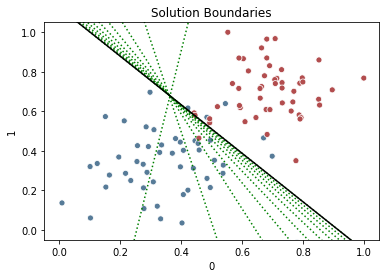

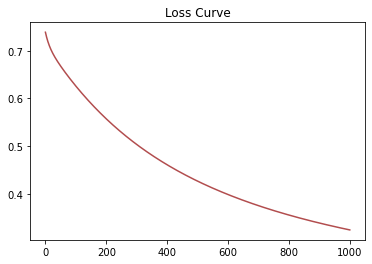

In [6]:
train(X, y, learnrate, epochs)